In [4]:
import pandas as pd
import tensorflow as tf
import custom_metrics as cm
import sklearn as sk
import numpy as np
import data_preprocessing as dp
import expenditure_predictor as ep
import matplotlib.pyplot as plt
import feature_selection as fs
import statsmodels.api as sm
import datetime
from sklearn import preprocessing
from tensorflow import keras
from tensorflow.python.keras import layers
from tensorflow.keras.models import load_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression, chi2, f_classif
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor

# Literatura métodos de filtro

In [5]:
literatura = ['NOCHES', 'ALOJ_CATEG', 'PERSONAS_TOTAL', 'ISLA', 'PAQUETE_TURISTICO', 'INGRESOS', 'PRIMERA_VISITA_CANARIAS',
              'NACIONALIDAD', 'EDAD', 'ACTIV_PLAYA', 'ACTIV_PISCINA', 'ACTIV_PASEAR', 'ACTIV_ISLA', 'SEXO',
              'ACTIV_EXCURS_ORGANIZ', 'ACTIV_EXCURS_MAR', 'ACTIV_ASTRONOMIA', 'ACTIV_POPULAR', 'ACTIV_GASTRONOMIA_CANARIA',
              'ACTIV_PARQUES_OCIO', 'ACTIV_OCIO', 'ACTIV_BELLEZA', 'ACTIV_DEPORTIVA', 'ACTIV_NATURALEZA', 'ACTIV_MAR']

X = dp.load_dataset('./datos/GASTO_TURISTICO_2018_ORIGINAL_2.csv', ';', ',', predictors=literatura, dummies=False, desglose=False)
#X.drop(X[X['PAQUETE_TURISTICO'] == 'NO_SABE'].index, inplace=True)

X = pd.get_dummies(X)

for col in X.columns:
    if col.endswith('NO_SABE') or col.endswith('NO_CONTESTA'):
        X = X.loc[X[col] == 0]
        X.pop(col)


print(X.shape)
scaler = StandardScaler()

y = X.pop('GASTO')

X = pd.DataFrame(scaler.fit_transform(X.values), columns=X.columns, index=X.index)

X['GASTO'] = y
X = X.sample(frac=1)
print(X.shape)

c:\users\amct2\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (140,141,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\amct2\PycharmProjects\tfg\data_preprocessing.py:84: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x = x[(y > q1 - IQR)]


(34379, 53)
(34379, 53)


In [6]:
fs.corr_selection(X, 0.1, 'GASTO')

GASTO                                   1.000
PERSONAS_TOTAL                          0.500
PAQUETE_TURISTICO_ALGUNO_GRATIS         0.349
ALOJ_CATEG_PROPIA                       0.297
PAQUETE_TURISTICO_SI                    0.294
NOCHES                                  0.277
INGRESOS                                0.223
ACTIV_PISCINA                           0.212
NACIONALIDAD_ESP724                     0.195
ALOJ_CATEG_HOTEL4                       0.163
ALOJ_CATEG_HOTEL5                       0.140
EDAD                                    0.134
ACTIV_PARQUES_OCIO                      0.111
ACTIV_EXCURS_ORGANIZ                    0.097
ALOJ_CATEG_PARTICULAR                   0.082
PAQUETE_TURISTICO_PAGADO_POR_SEPARADO   0.073
NACIONALIDAD_DEU276                     0.072
ACTIV_EXCURS_MAR                        0.069
ACTIV_OCIO                              0.068
NACIONALIDAD_ITA380                     0.059
ISLA_ES708                              0.058
PRIMERA_VISITA_CANARIAS           

In [3]:
fs.corr_selection(X, 0.1, 'GASTO')

GASTO                                   1.000
PERSONAS_TOTAL                          0.500
PAQUETE_TURISTICO_ALGUNO_GRATIS         0.349
ALOJ_CATEG_PROPIA                       0.297
PAQUETE_TURISTICO_SI                    0.294
NOCHES                                  0.277
INGRESOS                                0.223
ACTIV_PISCINA                           0.212
NACIONALIDAD_ESP724                     0.195
ALOJ_CATEG_HOTEL4                       0.163
ALOJ_CATEG_HOTEL5                       0.140
EDAD                                    0.134
ACTIV_PARQUES_OCIO                      0.111
ACTIV_EXCURS_ORGANIZ                    0.097
ALOJ_CATEG_PARTICULAR                   0.082
PAQUETE_TURISTICO_PAGADO_POR_SEPARADO   0.073
NACIONALIDAD_DEU276                     0.072
ACTIV_EXCURS_MAR                        0.069
ACTIV_OCIO                              0.068
NACIONALIDAD_ITA380                     0.059
ISLA_ES708                              0.058
PRIMERA_VISITA_CANARIAS           

In [4]:
fs.corr_selection(X, 0.2, 'GASTO')

GASTO                                   1.000
PERSONAS_TOTAL                          0.500
PAQUETE_TURISTICO_ALGUNO_GRATIS         0.349
ALOJ_CATEG_PROPIA                       0.297
PAQUETE_TURISTICO_SI                    0.294
NOCHES                                  0.277
INGRESOS                                0.223
ACTIV_PISCINA                           0.212
NACIONALIDAD_ESP724                     0.195
ALOJ_CATEG_HOTEL4                       0.163
ALOJ_CATEG_HOTEL5                       0.140
EDAD                                    0.134
ACTIV_PARQUES_OCIO                      0.111
ACTIV_EXCURS_ORGANIZ                    0.097
ALOJ_CATEG_PARTICULAR                   0.082
PAQUETE_TURISTICO_PAGADO_POR_SEPARADO   0.073
NACIONALIDAD_DEU276                     0.072
ACTIV_EXCURS_MAR                        0.069
ACTIV_OCIO                              0.068
NACIONALIDAD_ITA380                     0.059
ISLA_ES708                              0.058
PRIMERA_VISITA_CANARIAS           

In [5]:
fs.corr_selection(X, 0.3, 'GASTO')

GASTO                                   1.000
PERSONAS_TOTAL                          0.500
PAQUETE_TURISTICO_ALGUNO_GRATIS         0.349
ALOJ_CATEG_PROPIA                       0.297
PAQUETE_TURISTICO_SI                    0.294
NOCHES                                  0.277
INGRESOS                                0.223
ACTIV_PISCINA                           0.212
NACIONALIDAD_ESP724                     0.195
ALOJ_CATEG_HOTEL4                       0.163
ALOJ_CATEG_HOTEL5                       0.140
EDAD                                    0.134
ACTIV_PARQUES_OCIO                      0.111
ACTIV_EXCURS_ORGANIZ                    0.097
ALOJ_CATEG_PARTICULAR                   0.082
PAQUETE_TURISTICO_PAGADO_POR_SEPARADO   0.073
NACIONALIDAD_DEU276                     0.072
ACTIV_EXCURS_MAR                        0.069
ACTIV_OCIO                              0.068
NACIONALIDAD_ITA380                     0.059
ISLA_ES708                              0.058
PRIMERA_VISITA_CANARIAS           

In [6]:
fs.corr_selection(X, 0.4, 'GASTO')

GASTO                                   1.000
PERSONAS_TOTAL                          0.500
PAQUETE_TURISTICO_ALGUNO_GRATIS         0.349
ALOJ_CATEG_PROPIA                       0.297
PAQUETE_TURISTICO_SI                    0.294
NOCHES                                  0.277
INGRESOS                                0.223
ACTIV_PISCINA                           0.212
NACIONALIDAD_ESP724                     0.195
ALOJ_CATEG_HOTEL4                       0.163
ALOJ_CATEG_HOTEL5                       0.140
EDAD                                    0.134
ACTIV_PARQUES_OCIO                      0.111
ACTIV_EXCURS_ORGANIZ                    0.097
ALOJ_CATEG_PARTICULAR                   0.082
PAQUETE_TURISTICO_PAGADO_POR_SEPARADO   0.073
NACIONALIDAD_DEU276                     0.072
ACTIV_EXCURS_MAR                        0.069
ACTIV_OCIO                              0.068
NACIONALIDAD_ITA380                     0.059
ISLA_ES708                              0.058
PRIMERA_VISITA_CANARIAS           

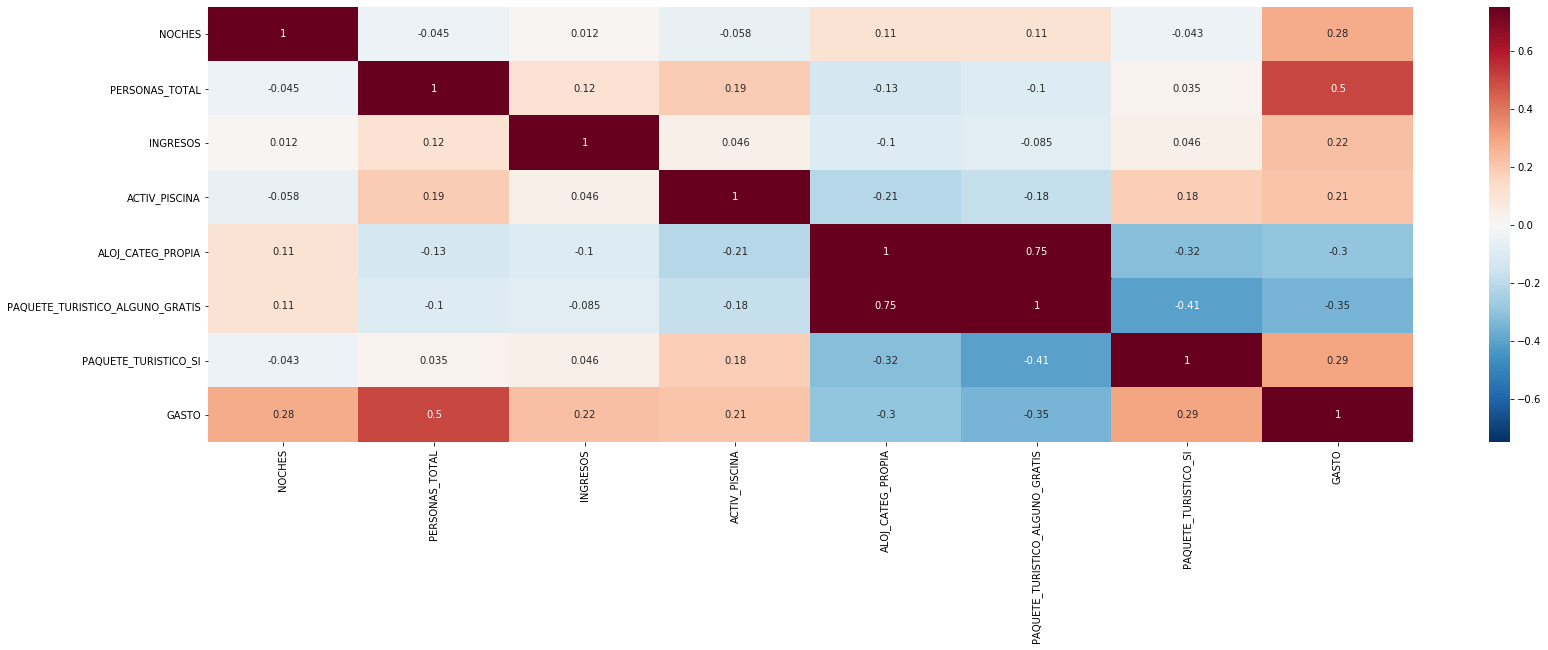

In [7]:
columns_2 = ['NOCHES', 'PERSONAS_TOTAL', 'INGRESOS', 'ACTIV_PISCINA',
       'ALOJ_CATEG_PROPIA', 'PAQUETE_TURISTICO_ALGUNO_GRATIS',
       'PAQUETE_TURISTICO_SI', 'GASTO']
X_res = X.loc[:, columns_2]
fs.show_correlation(X_res)

In [8]:
X_res.pop('GASTO')
fs.check_vif(X_res)

    VIF                        variables
0 1.016                           NOCHES
1 1.059                   PERSONAS_TOTAL
2 1.022                         INGRESOS
3 1.097                    ACTIV_PISCINA
4 2.332                ALOJ_CATEG_PROPIA
5 2.466  PAQUETE_TURISTICO_ALGUNO_GRATIS
6 1.217             PAQUETE_TURISTICO_SI


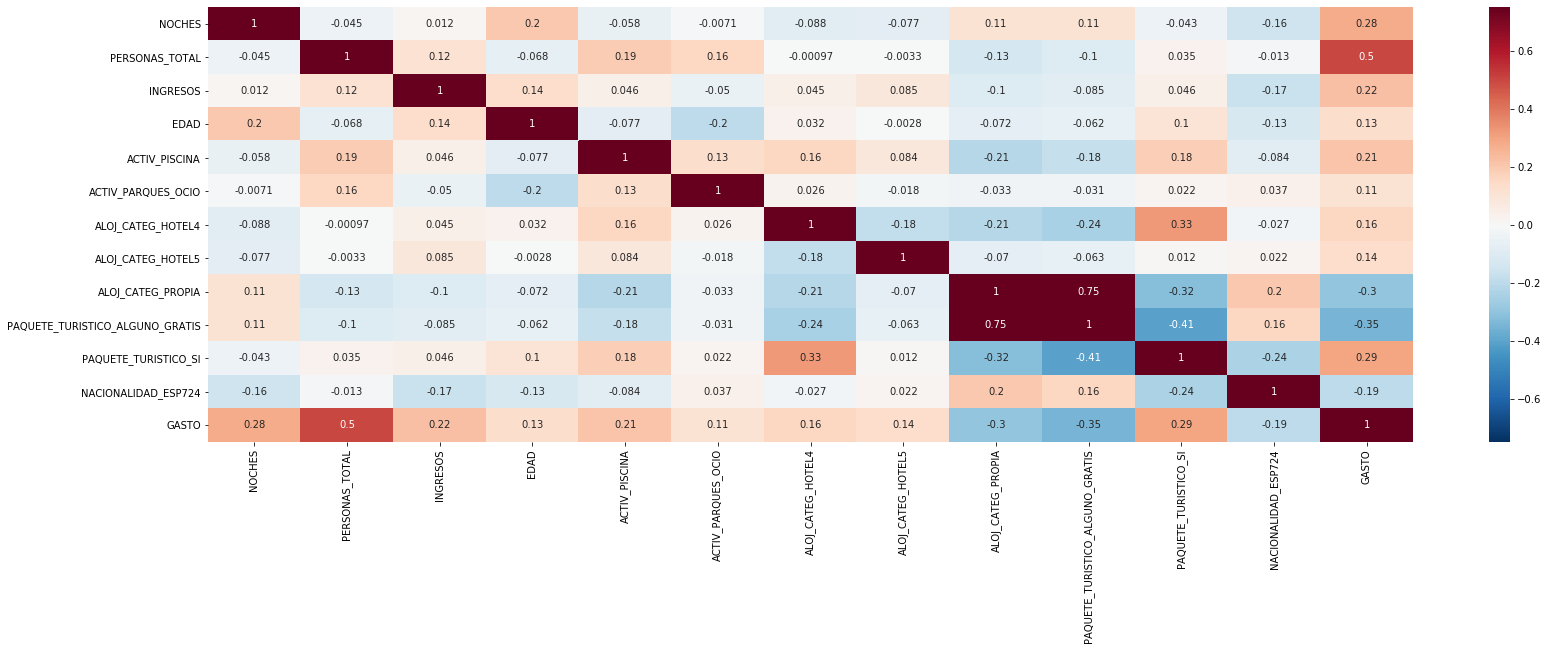

In [9]:
columns_1 = ['NOCHES', 'PERSONAS_TOTAL', 'INGRESOS', 'EDAD', 'ACTIV_PISCINA',
             'ACTIV_PARQUES_OCIO', 'ALOJ_CATEG_HOTEL4', 'ALOJ_CATEG_HOTEL5',
             'ALOJ_CATEG_PROPIA', 'PAQUETE_TURISTICO_ALGUNO_GRATIS',
             'PAQUETE_TURISTICO_SI', 'NACIONALIDAD_ESP724', 'GASTO']
X_res = X.loc[:, columns_1]
fs.show_correlation(X_res)

In [10]:
X_res.pop('GASTO')
fs.check_vif(X_res)

     VIF                        variables
0  1.107                           NOCHES
1  1.089                   PERSONAS_TOTAL
2  1.078                         INGRESOS
3  1.137                             EDAD
4  1.139                    ACTIV_PISCINA
5  1.079               ACTIV_PARQUES_OCIO
6  1.228                ALOJ_CATEG_HOTEL4
7  1.083                ALOJ_CATEG_HOTEL5
8  2.383                ALOJ_CATEG_PROPIA
9  2.477  PAQUETE_TURISTICO_ALGUNO_GRATIS
10 1.359             PAQUETE_TURISTICO_SI
11 1.161              NACIONALIDAD_ESP724


# Literatura Métodos wrapper - RFE

In [2]:
literatura = ['NOCHES', 'ALOJ_CATEG', 'PERSONAS_TOTAL', 'ISLA', 'PAQUETE_TURISTICO', 'INGRESOS', 'PRIMERA_VISITA_CANARIAS',
              'NACIONALIDAD', 'EDAD', 'ACTIV_PLAYA', 'ACTIV_PISCINA', 'ACTIV_PASEAR', 'ACTIV_ISLA', 'SEXO',
              'ACTIV_EXCURS_ORGANIZ', 'ACTIV_EXCURS_MAR', 'ACTIV_ASTRONOMIA', 'ACTIV_POPULAR', 'ACTIV_GASTRONOMIA_CANARIA',
              'ACTIV_PARQUES_OCIO', 'ACTIV_OCIO', 'ACTIV_BELLEZA', 'ACTIV_DEPORTIVA', 'ACTIV_NATURALEZA', 'ACTIV_MAR']

X = dp.load_dataset('./datos/GASTO_TURISTICO_2018_ORIGINAL_2.csv', ';', ',', predictors=literatura, dummies=False, desglose=False)
#X.drop(X[X['PAQUETE_TURISTICO'] == 'NO_SABE'].index, inplace=True)

X = pd.get_dummies(X)

for col in X.columns:
    if col.endswith('NO_SABE') or col.endswith('NO_CONTESTA'):
        X = X.loc[X[col] == 0]
        X.pop(col)

print(X.shape)
scaler = StandardScaler()

y = X.pop('GASTO')

X = pd.DataFrame(scaler.fit_transform(X.values), columns=X.columns, index=X.index)

#X['GASTO'] = y
X = X.sample(frac=1)
print(X.shape)

c:\users\amct2\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (140,141,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


(34379, 53)
(34379, 52)


C:\Users\amct2\PycharmProjects\tfg\data_preprocessing.py:84: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x = x[(y > q1 - IQR)]


Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 fe

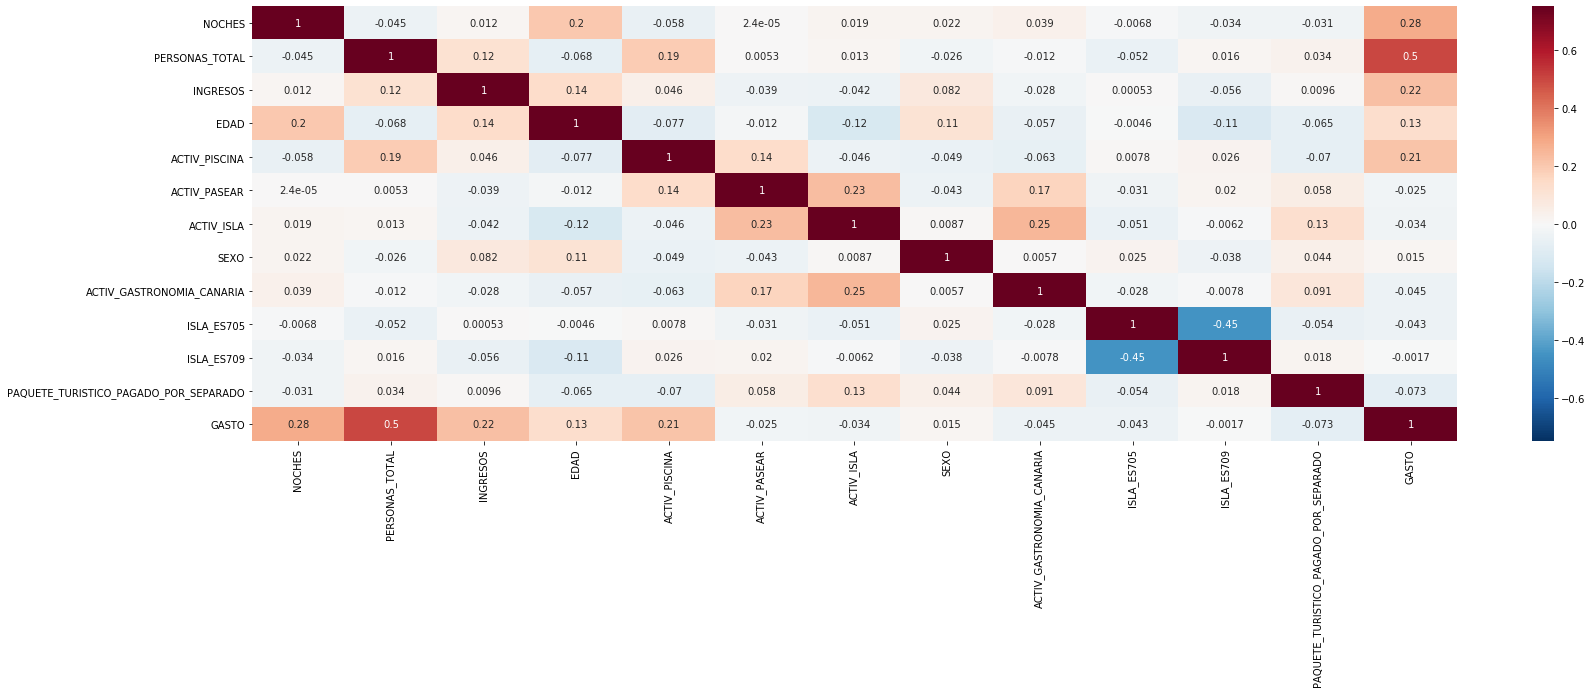

La selección ha tardado:  0:00:16.378204


In [3]:
model = DecisionTreeRegressor()
start = datetime.datetime.now()
fs.rfe_selection(X, y, model)
end = datetime.datetime.now()
print("La selección ha tardado: ", end-start)

In [4]:
columns_rfe = ['NOCHES', 'PERSONAS_TOTAL', 'INGRESOS', 'EDAD', 'ACTIV_PISCINA',
               'ACTIV_PASEAR', 'ACTIV_ISLA', 'SEXO', 'ACTIV_GASTRONOMIA_CANARIA',
               'ISLA_ES705', 'ISLA_ES709', 'PAQUETE_TURISTICO_PAGADO_POR_SEPARADO']
X_res = X.loc[:, columns_rfe]
fs.check_vif(X_res)

         VIF                              variables
0   1.050934                                 NOCHES
1   1.061896                         PERSONAS_TOTAL
2   1.047507                               INGRESOS
3   1.125228                                   EDAD
4   1.088906                          ACTIV_PISCINA
5   1.108004                           ACTIV_PASEAR
6   1.146070                             ACTIV_ISLA
7   1.024529                                   SEXO
8   1.093013              ACTIV_GASTRONOMIA_CANARIA
9   1.270302                             ISLA_ES705
10  1.280537                             ISLA_ES709
11  1.036784  PAQUETE_TURISTICO_PAGADO_POR_SEPARADO


# Literatura Métodos wrapper - RF

In [14]:
literatura = ['NOCHES', 'ALOJ_CATEG', 'PERSONAS_TOTAL', 'ISLA', 'PAQUETE_TURISTICO', 'INGRESOS', 'PRIMERA_VISITA_CANARIAS',
              'NACIONALIDAD', 'EDAD', 'ACTIV_PLAYA', 'ACTIV_PISCINA', 'ACTIV_PASEAR', 'ACTIV_ISLA', 'SEXO',
              'ACTIV_EXCURS_ORGANIZ', 'ACTIV_EXCURS_MAR', 'ACTIV_ASTRONOMIA', 'ACTIV_POPULAR', 'ACTIV_GASTRONOMIA_CANARIA',
              'ACTIV_PARQUES_OCIO', 'ACTIV_OCIO', 'ACTIV_BELLEZA', 'ACTIV_DEPORTIVA', 'ACTIV_NATURALEZA', 'ACTIV_MAR']

X = dp.load_dataset('./datos/GASTO_TURISTICO_2018_ORIGINAL_2.csv', ';', ',', predictors=literatura, dummies=False, desglose=False)
#X.drop(X[X['PAQUETE_TURISTICO'] == 'NO_SABE'].index, inplace=True)

X = pd.get_dummies(X)

for col in X.columns:
    if col.endswith('NO_SABE') or col.endswith('NO_CONTESTA'):
        X = X.loc[X[col] == 0]
        X.pop(col)
X = pd.get_dummies(X)
print(X.shape)
scaler = StandardScaler()

y = X.pop('GASTO')

X = pd.DataFrame(scaler.fit_transform(X.values), columns=X.columns, index=X.index)

#X['GASTO'] = y
X = X.sample(frac=1)
print(X.shape)

c:\users\amct2\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (140,141,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\amct2\PycharmProjects\tfg\data_preprocessing.py:84: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x = x[(y > q1 - IQR)]


(34379, 53)
(34379, 52)


In [15]:
start = datetime.datetime.now()
rf = fs.rf_selection(X, y, 4)
end = datetime.datetime.now()
print("La selección ha tardado: ", end-start)
cm.evaluate_lin_lin(test_dataset, test_labels, train_dataset, train_labels, rf)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 19.1min


building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed: 50.1min finished


('ISLA_-1', 0.0019822838556251077)
('ISLA_ES703_ES706', 0.0030014909118848735)
('NACIONALIDAD_CHE756', 0.00390779356335703)
('NACIONALIDAD_FIN246', 0.004364029720832239)
('NACIONALIDAD_DNK208', 0.005321793865539809)
('NACIONALIDAD_NOR578', 0.005618914710231908)
('ACTIV_ASTRONOMIA', 0.006297740482171486)
('ALOJ_CATEG_PROPIA', 0.006527691511109753)
('NACIONALIDAD_BEL056', 0.00707375888168156)
('NACIONALIDAD_IRL372', 0.007753086889059494)
('ALOJ_CATEG_OTROS', 0.007856718884460297)
('NACIONALIDAD_SWE752', 0.00822243441799597)
('ISLA_ES707', 0.00830156436563853)
('ALOJ_CATEG_PARTICULAR', 0.008329801030392856)
('NACIONALIDAD_FRA250', 0.008820424753737099)
('NACIONALIDAD_ITA380', 0.009169019543355444)
('PAQUETE_TURISTICO_ALGUNO_GRATIS', 0.009171675583996591)
('NACIONALIDAD_NLD528', 0.00974718217677163)
('ALOJ_CATEG_HOTEL5', 0.009985771893518574)
('ACTIV_NATURALEZA', 0.011561217818019038)
('ACTIV_BELLEZA', 0.01193202221839316)
('NACIONALIDAD_ZZZ900', 0.012668716507039875)
('ACTIV_EXCURS_MAR', 

NameError: name 'test_dataset' is not defined

In [17]:
columns_rf100 = ['EDAD', 'NOCHES', 'PERSONAS_TOTAL', 'INGRESOS', 'SEXO', 'ACTIV_PLAYA', 'ACTIV_ISLA', 'PRIMERA_VISITA_CANARIAS',
                 'ACTIV_PASEAR', 'ACTIV_PISCINA', 'ACTIV_GASTRONOMIA_CANARIA', 'ACTIV_OCIO', 'ISLA_ES705']


X_res = X.loc[:, columns_rf100]
fs.check_vif(X_res)

     VIF                  variables
0  1.223                       EDAD
1  1.064                     NOCHES
2  1.068             PERSONAS_TOTAL
3  1.054                   INGRESOS
4  1.025                       SEXO
5  1.141                ACTIV_PLAYA
6  1.163                 ACTIV_ISLA
7  1.092    PRIMERA_VISITA_CANARIAS
8  1.126               ACTIV_PASEAR
9  1.109              ACTIV_PISCINA
10 1.100  ACTIV_GASTRONOMIA_CANARIA
11 1.065                 ACTIV_OCIO
12 1.019                 ISLA_ES705


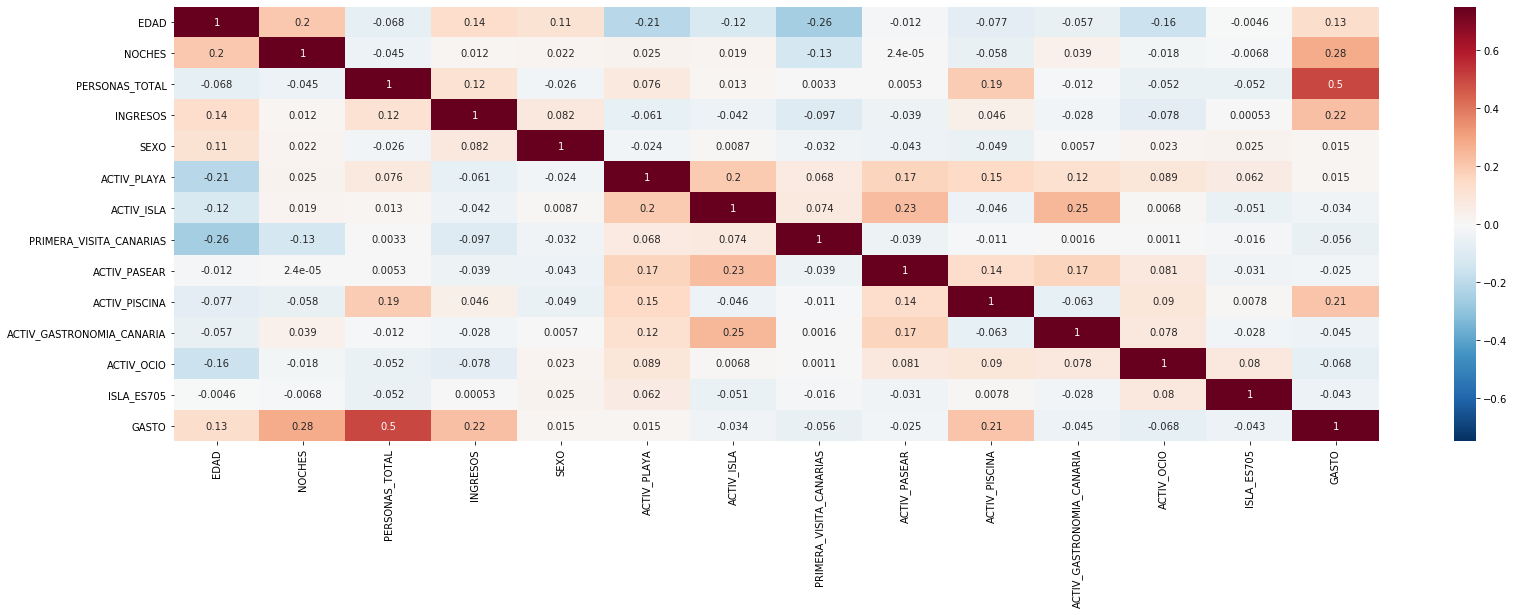

In [18]:
X_res['GASTO'] = y
fs.show_correlation(X_res)

# Todas las variables - Filtrado por correlación top 12

In [23]:
X = dp.load_dataset('./datos/GASTO_TURISTICO_2018_ORIGINAL_2.csv', ';', ',', predictors=None, dummies=True, desglose=False)

X.pop('COSTE_ALOJ_EUROS')
X.pop('GASTO_EUROS')
X.pop('COSTE_PAQUETE_EUROS')
X.pop('COSTE_VUELOS_EUROS')

print(X.shape)
scaler = StandardScaler()

#y = X.pop('GASTO')

X = pd.DataFrame(scaler.fit_transform(X.values), columns=X.columns, index=X.index)

#X['GASTO'] = y
X = X.sample(frac=1)
print(X.shape)

c:\users\amct2\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (140,141,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\amct2\PycharmProjects\tfg\data_preprocessing.py:84: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x = x[(y > q1 - IQR)]


(29071, 227)
(29071, 227)


In [24]:
fs.corr_selection(X, 0.1, 'GASTO')

GASTO                                                  1.000
PERSONAS_TOTAL                                         0.495
NOCHES                                                 0.360
COMPANNIA_HIJOS                                        0.355
PERSONAS_3_12                                          0.335
PERSONAS_HOGAR                                         0.241
COMPANNIA_SOLO                                         0.239
PERSONAS_13_15                                         0.236
PERSONAS_16_64                                         0.226
MOTIVACION_1_DISFRUTAR_FAMILIA                         0.223
INGRESOS                                               0.201
PAQUETE_TURISTICO_SI                                   0.199
ANTELACION_VIAJE_MAS_DE_6_MESES                        0.188
HORAS_DIA                                              0.167
PAQUETE_TURISTICO_PAGADO_POR_SEPARADO                  0.166
TIPO_PENSION_SOLO_ALOJAMIENTO                          0.161
SERV_TRANSFERS          

Index(['TRIMESTRE_2018Q3', 'TIPO_PENSION_SOLO_ALOJAMIENTO', 'SERV_TRANSFERS',
       'PROPOSITO_VACACIONES_OCIO_ENTRETENIMIENTO',
       'PROPOSITO_NEGOCIOS_TRABAJO', 'PERSONAS_TOTAL', 'PERSONAS_HOGAR',
       'PERSONAS_3_12', 'PERSONAS_16_64', 'PERSONAS_13_15',
       'PAQUETE_TURISTICO_SI', 'PAQUETE_TURISTICO_PAGADO_POR_SEPARADO',
       'PAQUETE_TURISTICO_ALGUNO_GRATIS', 'PAIS_RESIDENCIA_ESP724',
       'PAIS_DESTINO_ESP724', 'NOCHES_TF', 'NOCHES_LZ', 'NOCHES',
       'NACIONALIDAD_ESP724', 'MOTIVACION_1_DISFRUTAR_FAMILIA', 'INGRESOS',
       'HORAS_DIA', 'GRATIS_ALOJ', 'GASTO', 'EDAD',
       'COMPRA_VUELO_TOUROPERADOR_AGENCIA_SIMILAR',
       'COMPRA_VUELO_COMPANNIA_ALOJAMIENTO',
       'COMPRA_ALOJ_TOUROPERADOR_AGENCIA_SIMILAR',
       'COMPRA_ALOJ_COMPANNIA_ALOJAMIENTO', 'COMPANNIA_SOLO',
       'COMPANNIA_OTROS_FAMILIARES', 'COMPANNIA_HIJOS',
       'CANAL_TOUROPERADOR_AGENCIA_VIAJE', 'ANTELACION_VIAJE_MAS_DE_6_MESES',
       'ANTELACION_VIAJE_1-15_DIAS', 'ALOJ_CATEG_PARTICULAR

In [34]:
columns = ['TRIMESTRE_2018Q3', 'TIPO_PENSION_SOLO_ALOJAMIENTO', 'SERV_TRANSFERS',
       'PROPOSITO_VACACIONES_OCIO_ENTRETENIMIENTO',
       'PROPOSITO_NEGOCIOS_TRABAJO', 'PERSONAS_TOTAL', 'PERSONAS_HOGAR',
       'PERSONAS_3_12', 'PERSONAS_16_64', 'PERSONAS_13_15',
       'PAQUETE_TURISTICO_SI', 'PAQUETE_TURISTICO_PAGADO_POR_SEPARADO',
       'PAQUETE_TURISTICO_ALGUNO_GRATIS', 'PAIS_RESIDENCIA_ESP724',
       'PAIS_DESTINO_ESP724', 'NOCHES_TF', 'NOCHES_LZ', 'NOCHES',
       'NACIONALIDAD_ESP724', 'MOTIVACION_1_DISFRUTAR_FAMILIA', 'INGRESOS',
       'HORAS_DIA', 'GRATIS_ALOJ', 'EDAD',
       'COMPRA_VUELO_TOUROPERADOR_AGENCIA_SIMILAR',
       'COMPRA_VUELO_COMPANNIA_ALOJAMIENTO',
       'COMPRA_ALOJ_TOUROPERADOR_AGENCIA_SIMILAR',
       'COMPRA_ALOJ_COMPANNIA_ALOJAMIENTO', 'COMPANNIA_SOLO',
       'COMPANNIA_OTROS_FAMILIARES', 'COMPANNIA_HIJOS',
       'CANAL_TOUROPERADOR_AGENCIA_VIAJE', 'ANTELACION_VIAJE_MAS_DE_6_MESES',
       'ANTELACION_VIAJE_1-15_DIAS', 'ALOJ_CATEG_PARTICULAR',
       'ALOJ_CATEG_HOTEL5', 'ACTIV_PISCINA', 'ACTIV_PARQUES_OCIO']
X_res = X.loc[:, columns]

In [35]:
X_res.pop('PROPOSITO_VACACIONES_OCIO_ENTRETENIMIENTO')
fs.check_vif(X_res)

c:\users\amct2\appdata\local\programs\python\python36\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


           VIF                                  variables
0        1.144                           TRIMESTRE_2018Q3
1        1.436              TIPO_PENSION_SOLO_ALOJAMIENTO
2        1.868                             SERV_TRANSFERS
3        1.119                 PROPOSITO_NEGOCIOS_TRABAJO
4        5.493                             PERSONAS_TOTAL
5        1.309                             PERSONAS_HOGAR
6        2.997                              PERSONAS_3_12
7        3.089                             PERSONAS_16_64
8        1.528                             PERSONAS_13_15
9          inf                       PAQUETE_TURISTICO_SI
10         inf      PAQUETE_TURISTICO_PAGADO_POR_SEPARADO
11         inf            PAQUETE_TURISTICO_ALGUNO_GRATIS
12      14.769                     PAIS_RESIDENCIA_ESP724
13       4.190                        PAIS_DESTINO_ESP724
14       1.241                                  NOCHES_TF
15       1.171                                  NOCHES_LZ
16       1.313

In [36]:
X_res.pop('COMPRA_ALOJ_TOUROPERADOR_AGENCIA_SIMILAR')
fs.check_vif(X_res)

c:\users\amct2\appdata\local\programs\python\python36\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


         VIF                                  variables
0      1.144                           TRIMESTRE_2018Q3
1      1.436              TIPO_PENSION_SOLO_ALOJAMIENTO
2      1.868                             SERV_TRANSFERS
3      1.119                 PROPOSITO_NEGOCIOS_TRABAJO
4      5.493                             PERSONAS_TOTAL
5      1.309                             PERSONAS_HOGAR
6      2.997                              PERSONAS_3_12
7      3.089                             PERSONAS_16_64
8      1.528                             PERSONAS_13_15
9        inf                       PAQUETE_TURISTICO_SI
10       inf      PAQUETE_TURISTICO_PAGADO_POR_SEPARADO
11       inf            PAQUETE_TURISTICO_ALGUNO_GRATIS
12    14.769                     PAIS_RESIDENCIA_ESP724
13     4.190                        PAIS_DESTINO_ESP724
14     1.241                                  NOCHES_TF
15     1.171                                  NOCHES_LZ
16     1.313                                    

In [37]:
X_res.pop('COMPRA_VUELO_TOUROPERADOR_AGENCIA_SIMILAR')
X_res.pop('COMPRA_VUELO_COMPANNIA_ALOJAMIENTO')
fs.check_vif(X_res)

c:\users\amct2\appdata\local\programs\python\python36\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


      VIF                              variables
0   1.144                       TRIMESTRE_2018Q3
1   1.432          TIPO_PENSION_SOLO_ALOJAMIENTO
2   1.867                         SERV_TRANSFERS
3   1.117             PROPOSITO_NEGOCIOS_TRABAJO
4   5.494                         PERSONAS_TOTAL
5   1.309                         PERSONAS_HOGAR
6   2.997                          PERSONAS_3_12
7   3.089                         PERSONAS_16_64
8   1.528                         PERSONAS_13_15
9     inf                   PAQUETE_TURISTICO_SI
10    inf  PAQUETE_TURISTICO_PAGADO_POR_SEPARADO
11    inf        PAQUETE_TURISTICO_ALGUNO_GRATIS
12 14.768                 PAIS_RESIDENCIA_ESP724
13  4.189                    PAIS_DESTINO_ESP724
14  1.241                              NOCHES_TF
15  1.170                              NOCHES_LZ
16  1.313                                 NOCHES
17 12.603                    NACIONALIDAD_ESP724
18  1.273         MOTIVACION_1_DISFRUTAR_FAMILIA
19  1.104           

In [38]:
X_res.pop('PAIS_RESIDENCIA_ESP724')
X_res.pop('PAIS_DESTINO_ESP724')
fs.check_vif(X_res)

c:\users\amct2\appdata\local\programs\python\python36\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


     VIF                              variables
0  1.144                       TRIMESTRE_2018Q3
1  1.431          TIPO_PENSION_SOLO_ALOJAMIENTO
2  1.863                         SERV_TRANSFERS
3  1.116             PROPOSITO_NEGOCIOS_TRABAJO
4  5.493                         PERSONAS_TOTAL
5  1.309                         PERSONAS_HOGAR
6  2.997                          PERSONAS_3_12
7  3.088                         PERSONAS_16_64
8  1.528                         PERSONAS_13_15
9    inf                   PAQUETE_TURISTICO_SI
10   inf  PAQUETE_TURISTICO_PAGADO_POR_SEPARADO
11   inf        PAQUETE_TURISTICO_ALGUNO_GRATIS
12 1.241                              NOCHES_TF
13 1.168                              NOCHES_LZ
14 1.310                                 NOCHES
15 1.239                    NACIONALIDAD_ESP724
16 1.273         MOTIVACION_1_DISFRUTAR_FAMILIA
17 1.101                               INGRESOS
18 1.189                              HORAS_DIA
19 5.178                            GRAT

In [39]:
X_res.pop('PAQUETE_TURISTICO_PAGADO_POR_SEPARADO')
fs.check_vif(X_res)

     VIF                          variables
0  1.144                   TRIMESTRE_2018Q3
1  1.431      TIPO_PENSION_SOLO_ALOJAMIENTO
2  1.863                     SERV_TRANSFERS
3  1.116         PROPOSITO_NEGOCIOS_TRABAJO
4  5.493                     PERSONAS_TOTAL
5  1.309                     PERSONAS_HOGAR
6  2.997                      PERSONAS_3_12
7  3.088                     PERSONAS_16_64
8  1.528                     PERSONAS_13_15
9  2.482               PAQUETE_TURISTICO_SI
10 5.214    PAQUETE_TURISTICO_ALGUNO_GRATIS
11 1.241                          NOCHES_TF
12 1.168                          NOCHES_LZ
13 1.310                             NOCHES
14 1.239                NACIONALIDAD_ESP724
15 1.273     MOTIVACION_1_DISFRUTAR_FAMILIA
16 1.102                           INGRESOS
17 1.189                          HORAS_DIA
18 5.178                        GRATIS_ALOJ
19 1.598                               EDAD
20 1.562  COMPRA_ALOJ_COMPANNIA_ALOJAMIENTO
21 1.243                     COM

In [40]:
X_res.pop('PAQUETE_TURISTICO_ALGUNO_GRATIS')
fs.check_vif(X_res)

     VIF                          variables
0  1.144                   TRIMESTRE_2018Q3
1  1.431      TIPO_PENSION_SOLO_ALOJAMIENTO
2  1.863                     SERV_TRANSFERS
3  1.114         PROPOSITO_NEGOCIOS_TRABAJO
4  5.493                     PERSONAS_TOTAL
5  1.309                     PERSONAS_HOGAR
6  2.996                      PERSONAS_3_12
7  3.088                     PERSONAS_16_64
8  1.528                     PERSONAS_13_15
9  2.472               PAQUETE_TURISTICO_SI
10 1.241                          NOCHES_TF
11 1.168                          NOCHES_LZ
12 1.310                             NOCHES
13 1.239                NACIONALIDAD_ESP724
14 1.273     MOTIVACION_1_DISFRUTAR_FAMILIA
15 1.102                           INGRESOS
16 1.189                          HORAS_DIA
17 1.040                        GRATIS_ALOJ
18 1.598                               EDAD
19 1.561  COMPRA_ALOJ_COMPANNIA_ALOJAMIENTO
20 1.243                     COMPANNIA_SOLO
21 1.267         COMPANNIA_OTROS

In [33]:
print(X_res.columns)

Index(['TRIMESTRE_2018Q3', 'TIPO_PENSION_SOLO_ALOJAMIENTO', 'SERV_TRANSFERS',
       'PROPOSITO_NEGOCIOS_TRABAJO', 'PERSONAS_TOTAL', 'PERSONAS_HOGAR',
       'PERSONAS_3_12', 'PERSONAS_16_64', 'PERSONAS_13_15',
       'PAQUETE_TURISTICO_SI', 'NOCHES_TF', 'NOCHES_LZ', 'NOCHES',
       'NACIONALIDAD_ESP724', 'MOTIVACION_1_DISFRUTAR_FAMILIA', 'INGRESOS',
       'HORAS_DIA', 'GRATIS_ALOJ', 'GASTO', 'EDAD',
       'COMPRA_ALOJ_COMPANNIA_ALOJAMIENTO', 'COMPANNIA_SOLO',
       'COMPANNIA_OTROS_FAMILIARES', 'COMPANNIA_HIJOS',
       'CANAL_TOUROPERADOR_AGENCIA_VIAJE', 'ANTELACION_VIAJE_MAS_DE_6_MESES',
       'ANTELACION_VIAJE_1-15_DIAS', 'ALOJ_CATEG_PARTICULAR',
       'ALOJ_CATEG_HOTEL5', 'ACTIV_PISCINA', 'ACTIV_PARQUES_OCIO'],
      dtype='object')


# Todas las variables - RFE

In [2]:
X = dp.load_dataset('./datos/GASTO_TURISTICO_2018_ORIGINAL_2.csv', ';', ',', predictors=None, dummies=True, desglose=False)

X.pop('COSTE_ALOJ_EUROS')
X.pop('GASTO_EUROS')
X.pop('COSTE_PAQUETE_EUROS')
X.pop('COSTE_VUELOS_EUROS')

print(X.shape)
scaler = StandardScaler()

y = X.pop('GASTO')

#X = pd.DataFrame(scaler.fit_transform(X.values), columns=X.columns, index=X.index)

#X['GASTO'] = y
X = X.sample(frac=1)
print(X.shape)

c:\users\amct2\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (140,141,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


(29071, 253)
(29071, 252)


C:\Users\amct2\PycharmProjects\tfg\data_preprocessing.py:83: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x = x[(y > q1 - IQR)]


Fitting estimator with 253 features.
Fitting estimator with 252 features.
Fitting estimator with 251 features.
Fitting estimator with 250 features.
Fitting estimator with 249 features.
Fitting estimator with 248 features.
Fitting estimator with 247 features.
Fitting estimator with 246 features.
Fitting estimator with 245 features.
Fitting estimator with 244 features.
Fitting estimator with 243 features.
Fitting estimator with 242 features.
Fitting estimator with 241 features.
Fitting estimator with 240 features.
Fitting estimator with 239 features.
Fitting estimator with 238 features.
Fitting estimator with 237 features.
Fitting estimator with 236 features.
Fitting estimator with 235 features.
Fitting estimator with 234 features.
Fitting estimator with 233 features.
Fitting estimator with 232 features.
Fitting estimator with 231 features.
Fitting estimator with 230 features.
Fitting estimator with 229 features.
Fitting estimator with 228 features.
Fitting estimator with 227 features.
F

Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Index(['EDAD', 'IMPORTANCIA_EUROPA', 'NOCHES', 'HORAS_DIA',
       'VISITAS_TOTAL_CANARIAS', 'VISITAS_TOTAL_LZ', 'VISITAS_TOTAL_TF',
       'SATISFACCION', 'INGRESOS', 'GASTO', 'GASTO'],
      dtype='object')


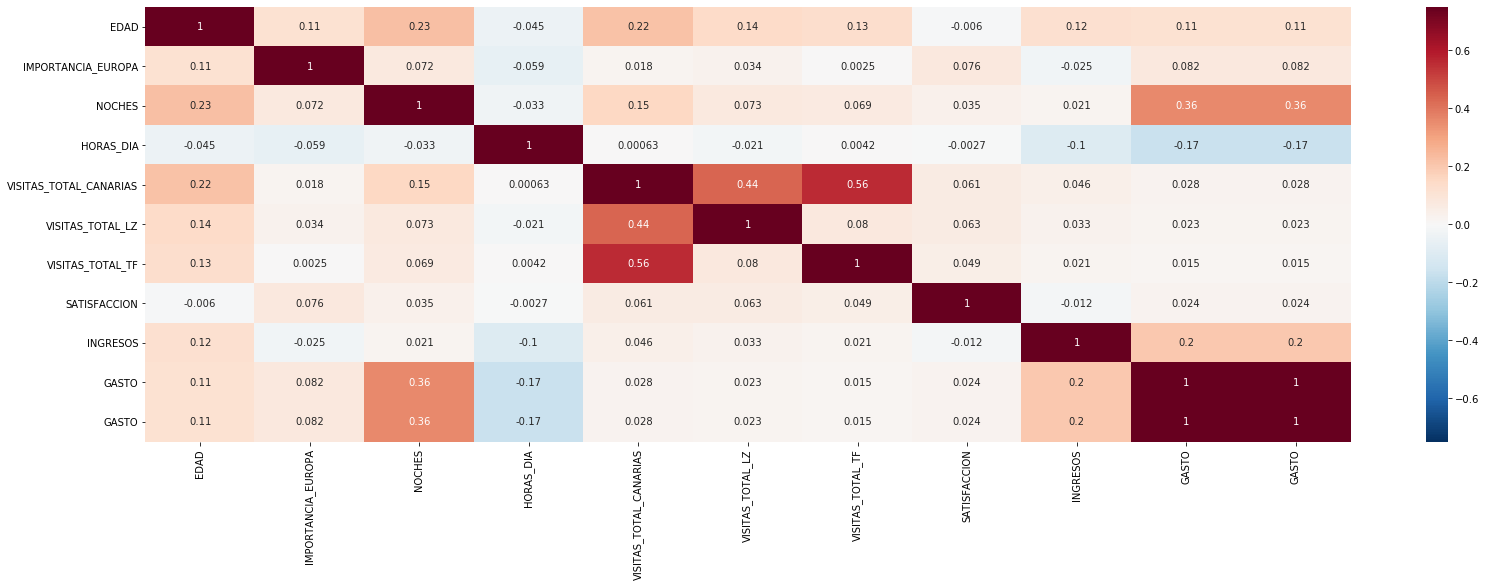

La selección ha tardado:  0:06:41.925787


In [25]:
start = datetime.datetime.now()
model = DecisionTreeRegressor()
fs.rfe_selection(X, y, model)
end = datetime.datetime.now()
print("La selección ha tardado: ", end-start)

In [5]:
start = datetime.datetime.now()
model = LinearRegression(fit_intercept=True)
fs.rfe_cv_selection(X, y, model)
end = datetime.datetime.now()
print("La selección ha tardado: ", end-start)

Fitting estimator with 252 features.
Fitting estimator with 251 features.
Fitting estimator with 250 features.
Fitting estimator with 249 features.
Fitting estimator with 248 features.
Fitting estimator with 247 features.
Fitting estimator with 246 features.
Fitting estimator with 245 features.
Fitting estimator with 244 features.
Fitting estimator with 243 features.
Fitting estimator with 242 features.
Fitting estimator with 241 features.
Fitting estimator with 240 features.
Fitting estimator with 239 features.
Fitting estimator with 238 features.
Fitting estimator with 237 features.
Fitting estimator with 236 features.
Fitting estimator with 235 features.
Fitting estimator with 234 features.
Fitting estimator with 233 features.
Fitting estimator with 232 features.
Fitting estimator with 231 features.
Fitting estimator with 230 features.
Fitting estimator with 229 features.
Fitting estimator with 228 features.
Fitting estimator with 227 features.
Fitting estimator with 226 features.
F

Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Index(['ISLA_-1', 'ISLA_ES703_ES706', 'ISLA_ES704', 'ISLA_ES705', 'ISLA_ES708',
       'ISLA_ES709', 'PAQUETE_TURISTICO_ALGUNO_GRATIS',
       'PAQUETE_TURISTICO_PAGADO_POR_SEPARADO', 'PAQUETE_TURISTICO_SI',
       'SERV_ALQ_VEHICULO_NO', 'SERV_ALQ_VEHICULO_SI', 'SERV_OTROS_NO',
       'SERV_OTROS_SI', 'GASTO'],
      dtype='object')
Número óptimo de características: 13
Puntuaciones:  [-4.45998667e-03 -4.51096190e-03 -4.39673038e-03 -4.35318425e-03
 -4.43276116e-03 -4.62183380e-03 -4.63238982e-03 -4.64946962e-03
 -4.74039744e-03 -4.78710302e-03 -4.81345072e-03 -4.91539291e-03
 -4.63643315e-03 -5.00888610e-03 -4.72929053e-03 -4.82060

# Todas las variables - Random Forest

In [4]:
start = datetime.datetime.now()
fs.rf_selection(X, y, 4)
end = datetime.datetime.now()
print("La selección ha tardado: ", end-start)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100building tree 3 of 100building tree 4 of 100



building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 65.9min


building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed: 186.7min finished


('ANNO', 0.0)
('PAIS_DESTINO_SEN686', 0.0)
('PAIS_DESTINO_VEN862', 2.1609912299365822e-07)
('PAIS_DESTINO_LTU440', 3.104196857713665e-05)
('PAIS_DESTINO_HUN348', 5.424882946950383e-05)
('PAIS_DESTINO_MRT478', 7.254831589743627e-05)
('PAIS_DESTINO_ROU642', 8.572421172742403e-05)
('SIN_PERNOCTAR_EH', 0.00010864039424234719)
('PROPOSITO_FERIAS_CONGRESOS', 0.0001291349005733934)
('PROPOSITO_EDUCACION_FORMACION', 0.00014309630938664163)
('PROPOSITO_SALUD_ATENCION_MEDICA', 0.0001643942515389139)
('PAIS_DESTINO_EST233', 0.0001644600728380882)
('SITUACION_LABORAL_SERV_MILITAR_O_COM_OBIGATORIO', 0.0001646961531272549)
('NOCHES_EH', 0.00016878085944389145)
('PROPOSITO_NEGOCIOS_TRABAJO', 0.00017543717081336318)
('PROPOSITO_ENTRENAMIENTO_DEPORTIVO', 0.00017736346607150682)
('PAIS_DESTINO_LVA428', 0.00021717292752784691)
('PAIS_DESTINO_MAR504', 0.00022992905392954014)
('ISLA_ES703_ES706', 0.00034415106734272656)
('ALOJ_CATEG_PROPIA', 0.0003557579591929069)
('PROPOSITO_OTRO', 0.00039243226635402484)

In [ ]:
predictors = ['IMPORTANCIA_OFERTA_CULTURAL', 'IMPORTANCIA_AUTENTICIDAD', 'IMPORTANCIA_VIAJE_SENCILLO', 'IMPORTANCIA_EXOTISMO',
              'NOCHES_TF', 'IMPORTANCIA_OFERTA_COMERCIAL', 'VISITAS_TOTAL_FV', 'IMPORTANCIA_EUROPA', 'IMPORTANCIA_DIVERSION',
              'RECOMENDAR_CANARIAS', 'IMPORTANCIA_GASTRONOMIA', 'VISITAS_TOTAL_LZ', 'INGRESOS', 'VISITAS_TOTAL_GC',
              'VOLVER_A_CANARIAS', 'PERSONAS_HOGAR', 'VISITAS_CANARIAS_5_ANNOS', 'NOCHES', 'HORAS_DIA', 'EDAD']